# <h1 style="font-family: Sans-Serif; padding: 19px; font-size: 40px; color: #641811; text-align: center; line-height: 1.9;"><b>Adidas Analysis</b><br><span style = "color: #CD2DE0; font-size:25px"></span></h1>
<hr>

<h2>This is a simple analysis of Us adidas sales data in 2020 & 2021<h2>

<a id="1"></a>

## <b>1<span style='color:#80055D'>|</span> INTRODUCTION 👋 </b>

Sure, here's the explanation of the variables for the provided dataset:

<div style="border-radius:10px;
            border : black solid;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Explanation of the variables 
</center></h2>  
    
* ****Retailer:**** The name of the retailer that sold the product.

* ****Retailer ID:**** The unique identifier of the retailer.

* ****Invoice Date:**** The date the invoice was issued.

* ****Region:**** The geographical region of the sale.

* ****State:**** The state of the sale.

* ****City:**** The city of the sale.

* ****Product:**** The type of product.

* ****Price per Unit:**** The price per unit of the product.

* ****Units Sold:**** The number of units sold.

* ****Total Sales:**** The total sales (number of units sold × price per unit).

* ****Operating Profit:**** The operating profit (total sales amount minus operational expenses).

* ****Operating Margin:**** The operating margin (operating profit per unit sold, expressed as a percentage of the price per unit).

* ****Sales Method:**** The method of sale (e.g., in-store, online).

<a id="2"></a>

## <b>2<span style='color:#80055D'>|</span> IMPORT PACKAGES 📦</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest , shapiro


<a id="3"></a>

## <b>3<span style='color:#80055D'>|</span>LOAD DATASET 📥</b>

In [2]:
df = pd.read_csv("F:\Analysis project\Adidas\Adidas US Sales Datasets.csv")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [3]:
df.shape

(9648, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


<a id="4"></a>

## <b>4<span style='color:#80055D'>|</span>CLEANING DATASET 🧹</b>

In [5]:
print('____'*10 + 'isna' +'____'*10)
print(df.isna().sum())
print('____'*10 + 'isnull' +'____'*10)
print(df.isnull().sum())
print('____'*10 + 'Duplicate' +'____'*10)
print(df.duplicated().sum())

________________________________________isna________________________________________
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64
________________________________________isnull________________________________________
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64
________________________________________Duplicate________________________________________
0


In [6]:
df['Price per Unit'] = df['Price per Unit'].str.replace('$','')
df['Price per Unit'] = df['Price per Unit'].astype('float')
df['Units Sold'] = df['Units Sold'].str.replace(',','')
df['Units Sold'] = df['Units Sold'].astype('int')
df['Price per Unit'] = df['Price per Unit'].astype('float')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,"$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,"$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,"$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,"$540,000","$162,000",30%,In-store


In [7]:
df['Total Sales'] = df['Units Sold']*df['Price per Unit']
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000.0,"$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000.0,"$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000.0,"$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250.0,"$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,54000.0,"$162,000",30%,In-store


In [8]:
df['Operating Margin'] = df['Operating Margin'].str.replace('%' ,'')
df['Operating Margin'] = df['Operating Margin'].astype('float')
df['Operating Margin'] = (df['Operating Margin']/100)
df['Operating Profit'] = (df['Operating Margin'])*df['Total Sales']
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000.0,30000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000.0,15000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000.0,14000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250.0,13387.5,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,54000.0,16200.0,0.30,In-store


<a id="5"></a>

## <b>5<span style='color:#80055D'>|</span> TOTAL ATTRIBUTE 🧮</b>

In [9]:
print(f"Total units sold :{df['Units Sold'].sum()}")
print(f"Total sales is :  {df['Total Sales'].sum()}")
print(f"Total Profits is :{df['Operating Profit'].sum()}")

Total units sold :2478861
Total sales is :  120166650.0
Total Profits is :47224967.7


<a id="6"></a>

## <b>6<span style='color:#80055D'>| </span>UNITS ⭐️</b>

In this section, we can check the highest sales in different cities based on the number of items. In this review, we come to the conclusion that the city with the highest sales is New York. You can also see the bar of the top 10 cities.

In [10]:
unit_city = df.groupby('City')['Units Sold'].sum().sort_values(ascending=False)
unit_city.head(10)

City
New York         111954
Charleston       102483
Houston           90322
San Francisco     86900
Los Angeles       76384
Miami             73135
Portland          72946
Dallas            69178
Knoxville         66077
Boise             63827
Name: Units Sold, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

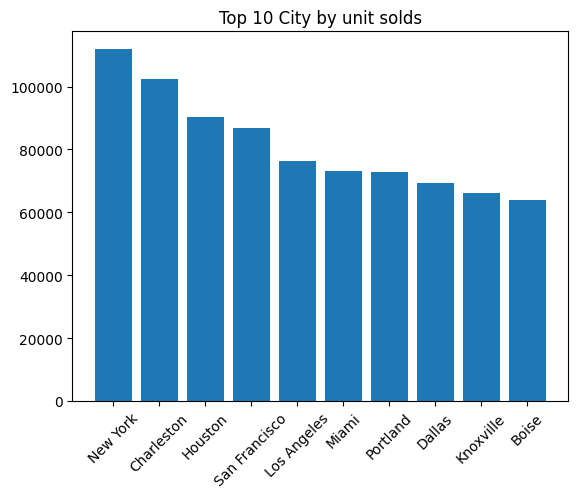

In [11]:
unit_city = unit_city.head(10)
plt.bar(unit_city.index , unit_city.values )
plt.xticks(rotation=45)
plt.title('Top 10 City by unit solds')
plt.show

In this section, we can check the highest sales in different regions based on the number of items. In this review, we come to the conclusion that the region with the highest sales is the West.

In [12]:
unit_Region= df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)
unit_Region.head(10)

Region
West         686985
Northeast    501279
South        492260
Southeast    407000
Midwest      391337
Name: Units Sold, dtype: int32

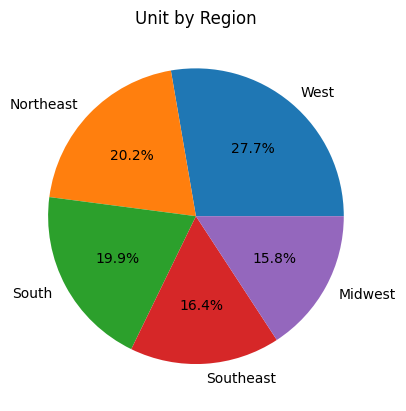

In [13]:
plt.pie(unit_Region.values, labels= unit_Region.index ,autopct='%1.1f%%')
plt.title('Unit by Region')
plt.show()

In [14]:
unit_product = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
unit_product.head(10)

Product
Men's Street Footwear        593320
Men's Athletic Footwear      435526
Women's Apparel              433827
Women's Street Footwear      392269
Women's Athletic Footwear    317236
Men's Apparel                306683
Name: Units Sold, dtype: int32

What is the maximum quantity in a shopping cart?


In [15]:
max_unit = df['Units Sold'].idxmax()
df.loc[max_unit]

Retailer                      Foot Locker
Retailer ID                       1185732
Invoice Date                    3/10/2020
Region                          Northeast
State                            New York
City                             New York
Product             Men's Street Footwear
Price per Unit                       60.0
Units Sold                           1275
Total Sales                       76500.0
Operating Profit                  38250.0
Operating Margin                      0.5
Sales Method                       Outlet
Name: 36, dtype: object

In [16]:
mens_products = 0
womens_products = 0
for product, quantity in unit_product.items():
    if "Men's" in product:
        mens_products += quantity
    elif "Women's" in product:
        womens_products += quantity

print(f"Mens Product :{mens_products}")
print(f"Womens Product :{womens_products}")

Mens Product :1335529
Womens Product :1143332


<function matplotlib.pyplot.show(close=None, block=None)>

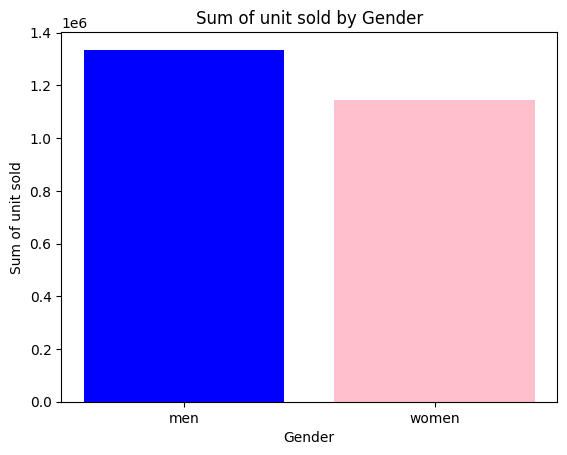

In [17]:
label = ['men' , 'women']
count = [mens_products , womens_products]
plt.bar(label , count , color=['blue', 'pink'])
plt.title('Sum of unit sold by Gender')
plt.xlabel('Gender')
plt.ylabel('Sum of unit sold')
plt.show

        Retailer  Units Sold
0      West Gear      625262
1    Foot Locker      604369
2  Sports Direct      557640
3         Kohl's      287375
4        Walmart      206225
5         Amazon      197990


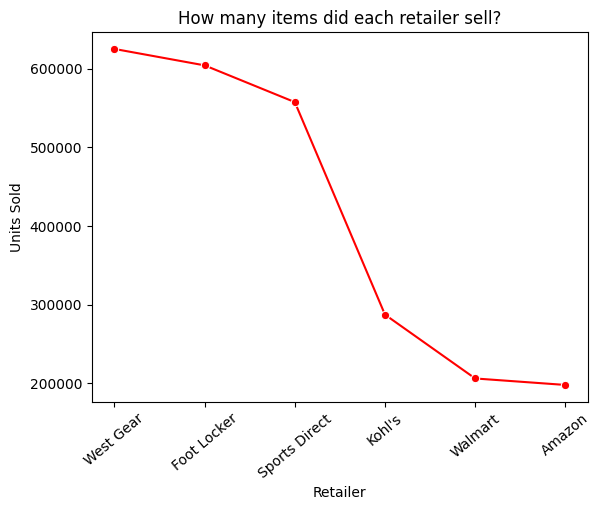

In [18]:
unit_retailer = df.groupby('Retailer')['Units Sold'].sum().sort_values(ascending=False)
unit_retailer = pd.DataFrame({'Retailer' : unit_retailer.index , 'Units Sold' :unit_retailer.values})
print(unit_retailer)
sns.lineplot(data= unit_retailer , x= 'Retailer' , y='Units Sold' , marker = 'o' , color = 'red')
plt.xticks(rotation = 40)
plt.title('How many items did each retailer sell?')
plt.show()


<a id="7"></a>

## <b>7<span style='color:#80055D'>|</span>PROFIT & TOTAL SALES 💰</b>

In [19]:

# Grouping the data by 'City' and summing up 'Total Sales' and 'Operating Profit'
sales_city = df.groupby("City")['Total Sales'].sum().sort_values(ascending=False).reset_index()
profit_city = df.groupby("City")['Operating Profit'].sum().sort_values(ascending=False).reset_index()

# Creating DataFrame
sales_city = pd.DataFrame({'City': sales_city['City'], 'Total Sales': sales_city['Total Sales']})
profit_city = pd.DataFrame({'City': profit_city['City'], 'Operating Profit': profit_city['Operating Profit']})

print(sales_city.head(10))
print("__"*20)
print(profit_city.head(10))


            City  Total Sales
0       New York    5676160.0
1  San Francisco    4929220.0
2     Charleston    4904272.0
3       Portland    4176777.0
4        Orlando    3946476.0
5          Miami    3874113.0
6    Los Angeles    3651288.0
7        Houston    3629632.0
8    New Orleans    3377031.0
9        Seattle    3222093.0
________________________________________
            City  Operating Profit
0       New York        2114664.41
1     Charleston        2024086.36
2  San Francisco        1581993.31
3          Miami        1579387.86
4       Portland        1575860.62
5        Houston        1494772.31
6    New Orleans        1424389.74
7    Los Angeles        1378158.34
8     Birmingham        1368206.39
9        Orlando        1342206.56


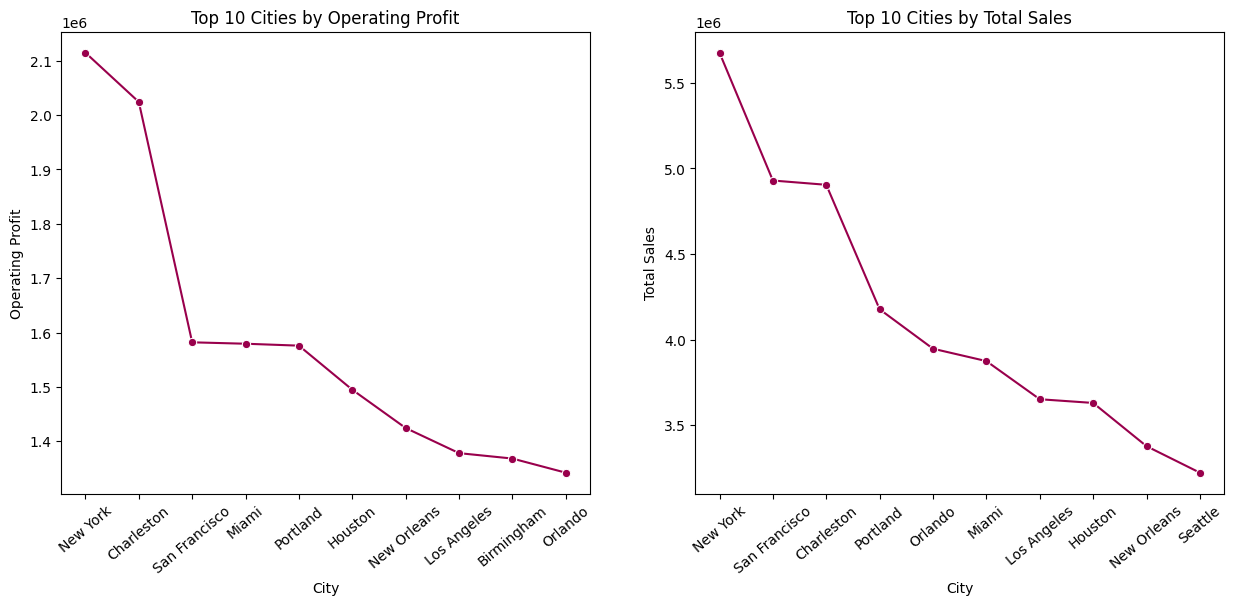

In [20]:
plt.figure(figsize = (15,6))

# Plot for Operating Profit
plt.subplot(1,2,1)
sns.lineplot(data=profit_city.head(10), x='City', y='Operating Profit', marker='o' , color ="#99004C" )
plt.xticks(rotation = 40)
plt.title('Top 10 Cities by Operating Profit')


# Plot for Total Sales
plt.subplot(1,2,2)
sns.lineplot(data=sales_city.head(10), x='City', y='Total Sales', marker='o' , color ="#99004C" )
plt.xticks(rotation = 40)
plt.title('Top 10 Cities by Total Sales')
plt.show()

In [21]:
# Convert 'Invoice Date' column to datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Group the data by month and sum up the 'Operating Profit' for each month
best_profit_month = df.groupby(df['Invoice Date'].dt.month)['Operating Profit'].sum().sort_values(ascending=False)
best_profit_month = pd.DataFrame({'Month' : best_profit_month.index , 'Profit': best_profit_month.values})


# Group the data by month and sum up the 'Total Sales' for each month
best_selling_month = df.groupby(df['Invoice Date'].dt.month)['Total Sales'].sum().sort_values(ascending=False)
best_selling_month = pd.DataFrame({'Month' : best_selling_month.index , 'Sales': best_selling_month.values})

print(best_selling_month)
print("__"*20)
print(best_profit_month)

    Month       Sales
0       7  12550419.0
1       8  12293226.0
2      12  11415332.0
3       5  10741720.0
4       9  10405584.0
5       6   9803147.0
6       1   9744767.0
7       4   9691420.0
8      11   9023440.0
9      10   8538758.0
10      2   8263853.0
11      3   7694984.0
________________________________________
    Month      Profit
0       8  4895507.80
1       7  4780283.59
2      12  4465428.28
3       9  4419480.48
4       5  4257206.58
5       4  3919679.81
6       6  3736782.17
7       1  3649934.51
8      10  3570098.35
9      11  3504800.18
10      2  3079367.95
11      3  2946398.00


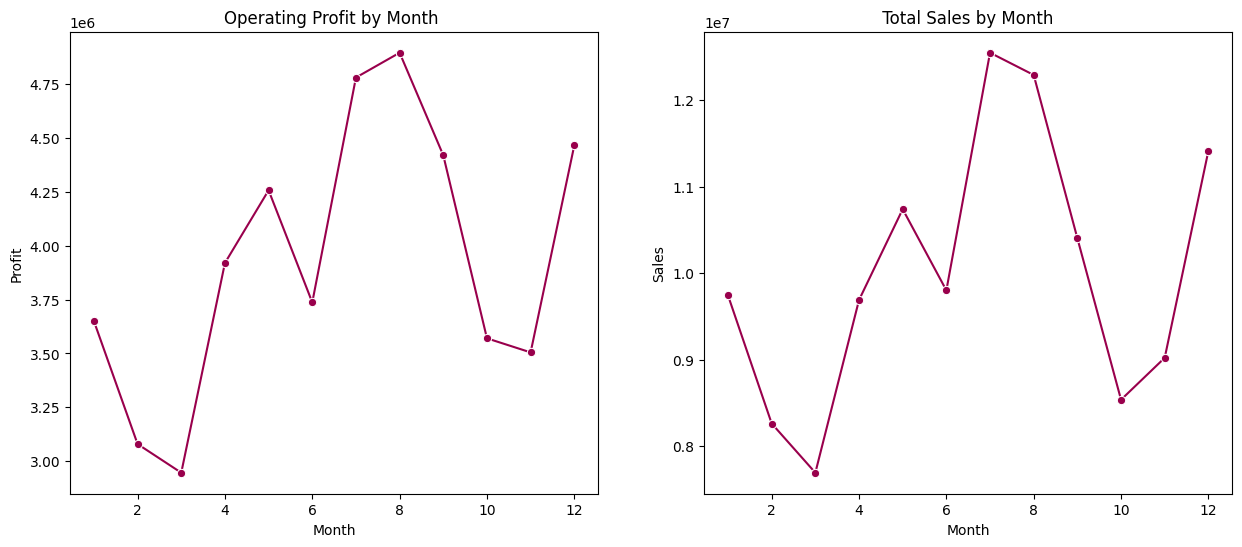

In [22]:
plt.figure(figsize = (15,6))
# Plot for Operating Profit
plt.subplot(1,2,1)
sns.lineplot(data=best_profit_month, x='Month', y='Profit', marker='o' , color ="#99004C" )
plt.title('Operating Profit by Month ')

# Plot for Total Sales
plt.subplot(1,2,2)
sns.lineplot(data=best_selling_month, x='Month', y='Sales', marker='o' , color ="#99004C" )
plt.title(' Total Sales by Month ')
plt.show()

In [66]:
best_selling_day = df.groupby(df['Invoice Date'])['Total Sales'].sum().sort_values(ascending=False)
best_selling_day

Invoice Date
2021-07-16    1719848.0
2021-12-16    1507746.0
2021-06-17    1397403.0
2021-08-17    1332656.0
2021-07-23    1096634.0
                ...    
2020-12-06       4734.0
2020-12-12       4300.0
2020-12-14       4154.0
2020-12-07       3869.0
2020-12-13       3297.0
Name: Total Sales, Length: 724, dtype: float64

In [24]:
table =df.groupby("Region")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
table["Precentage of Total Sales"] =((table['Total Sales'] / table['Total Sales'].sum()) * 100).round()
table["Precentage of Profit"] =((table['Operating Profit'] / table['Operating Profit'].sum()) * 100).round()
table

,Region,Total Sales,Operating Profit,Precentage of Total Sales,Precentage of Profit
0,Midwest,16674434.0,6859945.23,14.0,15.0
1,Northeast,25078267.0,9732773.90,21.0,21.0
2,South,20603356.0,9221605.32,17.0,20.0
3,Southeast,21374436.0,8393059.20,18.0,18.0
4,West,36436157.0,13017584.05,30.0,28.0


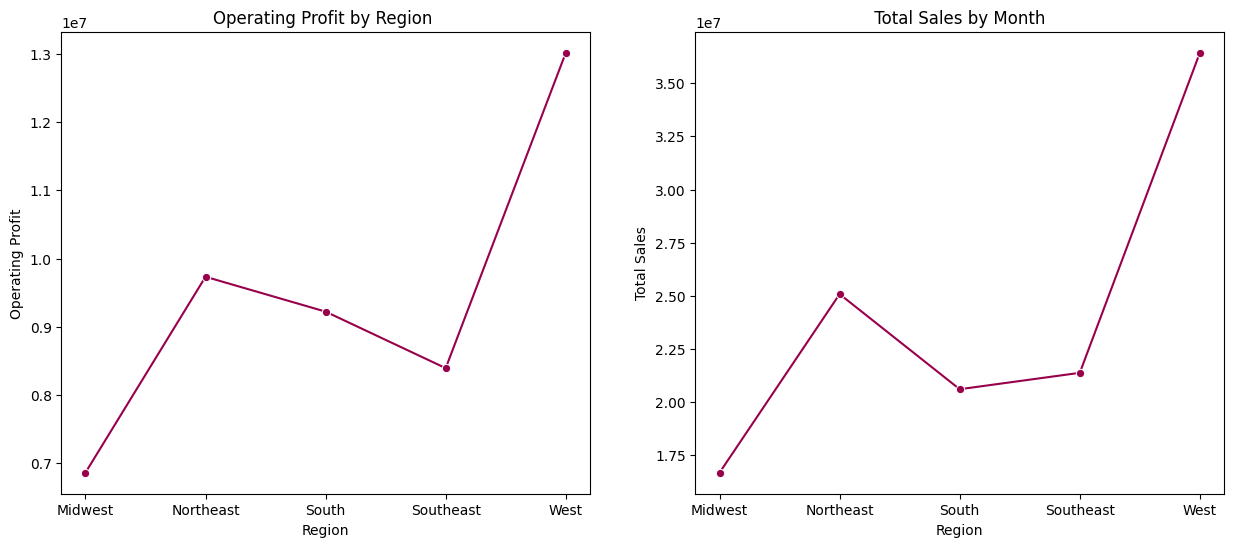

In [25]:
plt.figure(figsize = (15,6))
# Plot for Operating Profit
plt.subplot(1,2,1)
sns.lineplot(data=table, x='Region', y='Operating Profit', marker='o' , color ="#99004C" )
plt.title('Operating Profit by Region ')

# Plot for Total Sales
plt.subplot(1,2,2)
sns.lineplot(data=table, x='Region', y='Total Sales', marker='o' , color ="#99004C" )
plt.title(' Total Sales by Month ')
plt.show()

In [26]:
df.pivot_table(index= df['Invoice Date'].dt.month ,columns="Product" ,aggfunc={"Total Sales" :"sum"})

Total Sales                                                \
Product      Men's Apparel Men's Athletic Footwear Men's Street Footwear   
Invoice Date                                                               
1                1400793.0               1787636.0             2104320.0   
2                1241808.0               1485642.0             1911410.0   
3                1016767.0               1348321.0             1789628.0   
4                1325227.0               1598999.0             2222097.0   
5                1533097.0               1718383.0             2479218.0   
6                1245020.0               1482603.0             2237294.0   
7                1729296.0               2117905.0             3018128.0   
8                1572709.0               2430877.0             2900014.0   
9                1369579.0               1916493.0             2357206.0   
10               1152245.0               1438633.0             1920434.0   
11               1381161.0               1356286.0             1952501.0   
12               1552930.0               1895402.0             2788519.0   

                                                                                
Product      Women's Apparel Women's Athletic Footwear Women's Street Footwear  
Invoice Date                                                                    
1                  1823203.0                 1147337.0               1481478.0  
2                  1401780.0                  980223.0               1242990.0  
3                  1392193.0                  974101.0               1173974.0  
4                  2043854.0                 1092541.0               1408702.0  
5                  2256877.0                 1259935.0               1494210.0  
6                  2277660.0                 1158188.0               1402382.0  
7                  2559825.0                 1426359.0               1698906.0  
8                  2124819.0                 1446427.0               1818380.0  
9                  2006876.0                 1191479.0               1563951.0  
10                 1792051.0                 1038730.0               1196665.0  
11                 1989550.0                 1159409.0               1184533.0  
12                 2202297.0                 1440792.0               1535392.0

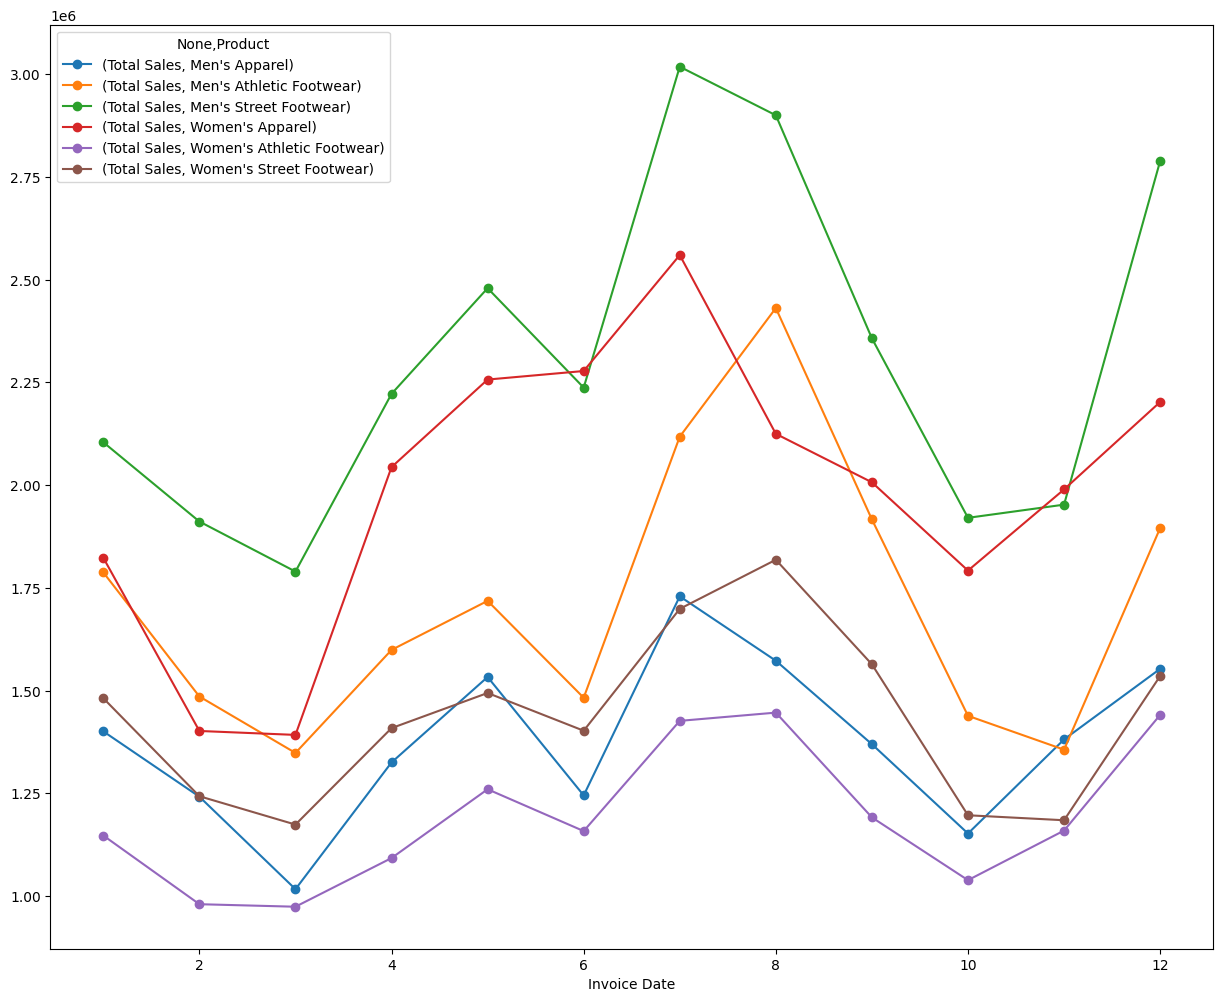

In [27]:
df.pivot_table(index= df['Invoice Date'].dt.month ,columns="Product" ,aggfunc={"Total Sales" :"sum"}).plot(marker="o" ,figsize= (15,12))

plt.show()

In [28]:
df.pivot_table(index= df['Invoice Date'].dt.month ,columns="Product" ,aggfunc={"Operating Profit" :"sum"})


Operating Profit                                                \
Product         Men's Apparel Men's Athletic Footwear Men's Street Footwear   
Invoice Date                                                                  
1                   600375.27               568404.77             905043.03   
2                   531330.00               474181.28             804081.63   
3                   421698.33               460967.08             771472.02   
4                   553833.02               586083.48             983480.65   
5                   648601.66               601451.98            1054512.28   
6                   442718.84               539828.12             899514.33   
7                   606634.37               770822.35            1201012.78   
8                   558167.99               917735.81            1191331.76   
9                   505205.11               768002.61            1014833.24   
10                  424471.95               564664.95             812791.97   
11                  509071.43               484723.47             820139.44   
12                  579297.36               700591.04            1170832.49   

                                                                                
Product      Women's Apparel Women's Athletic Footwear Women's Street Footwear  
Invoice Date                                                                    
1                  577985.36                 424936.87               573189.21  
2                  442323.20                 356018.15               471433.69  
3                  474702.96                 371947.01               445610.60  
4                  779275.75                 446535.55               570471.36  
5                  880085.33                 495489.40               577065.93  
6                  923832.24                 433978.38               496910.26  
7                 1053063.96                 542738.73               606011.40  
8                  978816.32                 583606.82               665849.10  
9                 1007261.31                 513949.38               610228.83  
10                 863433.05                 445029.36               459707.07  
11                 814802.09                 436317.53               439746.22  
12                 889638.99                 547275.26               577793.14

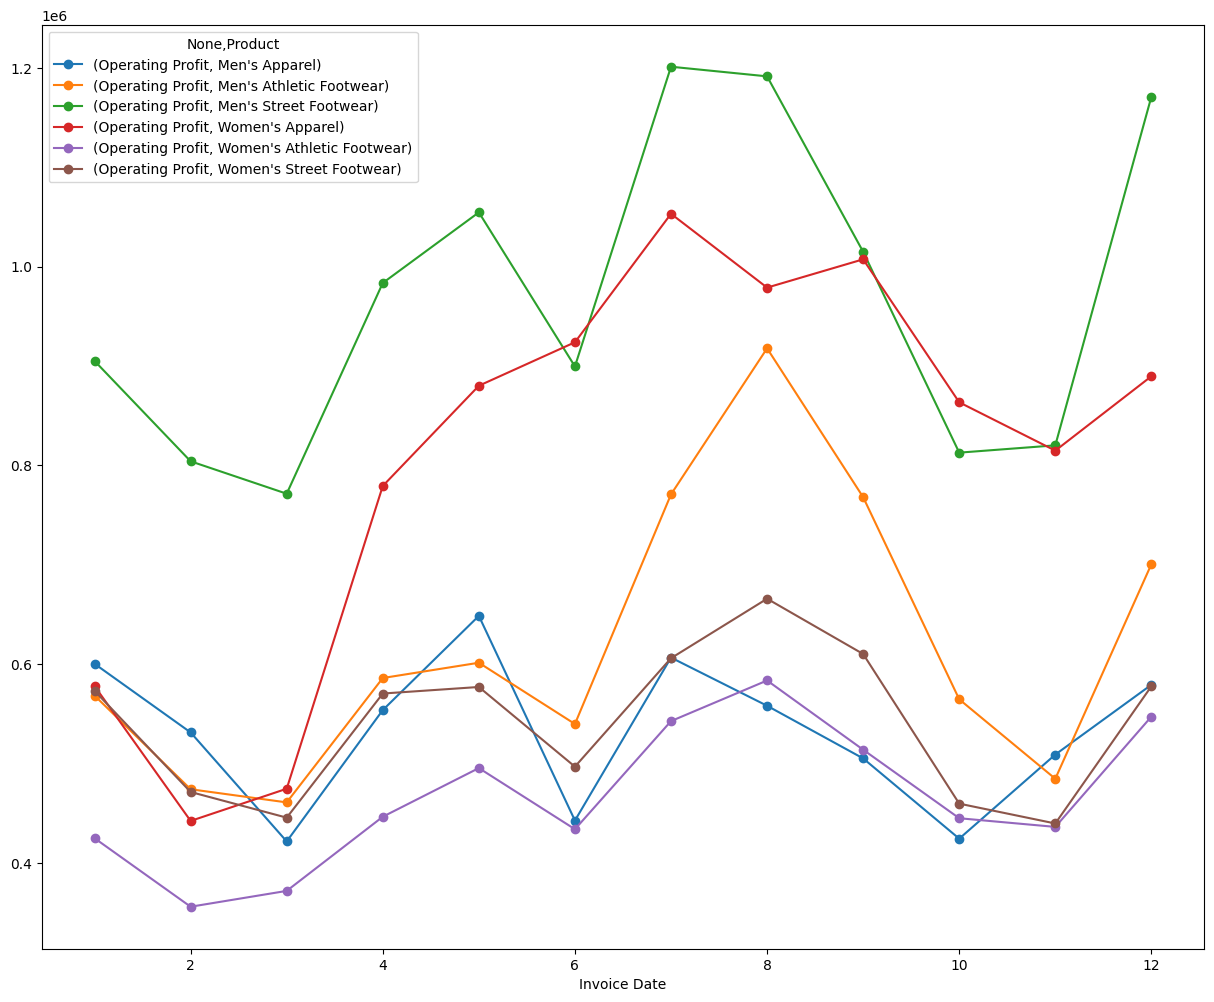

In [29]:
df.pivot_table(index= df['Invoice Date'].dt.month ,columns="Product" ,aggfunc={"Operating Profit" :"sum"}).plot(marker="o" ,figsize= (15,12))

plt.show()

In [30]:
profit_gender = df.groupby('Product')["Operating Profit"].sum()
sales_gender = df.groupby('Product')["Total Sales"].sum()

print(profit_gender)
print("_________________Sales_______________________")
print(sales_gender)


Product
Men's Apparel                 6381405.33
Men's Athletic Footwear       7437456.94
Men's Street Footwear        11629045.62
Women's Apparel               9685220.56
Women's Athletic Footwear     5597822.44
Women's Street Footwear       6494016.81
Name: Operating Profit, dtype: float64
_________________Sales_______________________
Product
Men's Apparel                16520632.0
Men's Athletic Footwear      20577180.0
Men's Street Footwear        27680769.0
Women's Apparel              23870985.0
Women's Athletic Footwear    14315521.0
Women's Street Footwear      17201563.0
Name: Total Sales, dtype: float64


In [33]:
mens_profit = 0
womens_profit = 0
for product, quantity in profit_gender.items():
    if "Men's" in product:
        mens_profit += quantity
    elif "Women's" in product:
        womens_profit += quantity

print(f"Mens Profit :{mens_profit}")
print(f"Womens Profit :{womens_profit}")

Mens Profit :0
Womens Profit :0


In [34]:
table3 = df.pivot_table(index= df['Retailer'] ,columns="Product" ,aggfunc={"Operating Profit" :"sum"})
table3

Operating Profit                                                \
Product          Men's Apparel Men's Athletic Footwear Men's Street Footwear   
Retailer                                                                       
Amazon               467531.30               628623.86            1201388.12   
Foot Locker         1399548.36              1758958.99            3207304.17   
Kohl's               833830.70               815081.35            1278816.14   
Sports Direct       1255208.46              1718985.31            2233091.68   
Walmart              489147.47               610213.90             819371.13   
West Gear           1936139.04              1905593.53            2889074.38   

                                                         \
Product       Women's Apparel Women's Athletic Footwear   
Retailer                                                  
Amazon              857796.53                 375276.49   
Foot Locker        2363432.74                1206269.98   
Kohl's              796022.50                 647705.59   
Sports Direct      2534198.17                1400646.39   
Walmart             950476.03                 489439.99   
West Gear          2183294.59                1478484.00   

                                       
Product       Women's Street Footwear  
Retailer                               
Amazon                      453815.76  
Foot Locker                1381513.07  
Kohl's                      810803.80  
Sports Direct              1499478.70  
Walmart                     544100.34  
West Gear                  1804305.14

        Retailer  Operating Profit
0      West Gear       12196890.68
1    Foot Locker       11317027.31
2  Sports Direct       10641608.71
3         Kohl's        5182260.08
4         Amazon        3984432.06
5        Walmart        3902748.86
________________________________________
        Retailer  Total Sales
0      West Gear   32409558.0
1    Foot Locker   29024945.0
2  Sports Direct   24616622.0
3         Kohl's   13512453.0
4        Walmart   10506085.0
5         Amazon   10096987.0


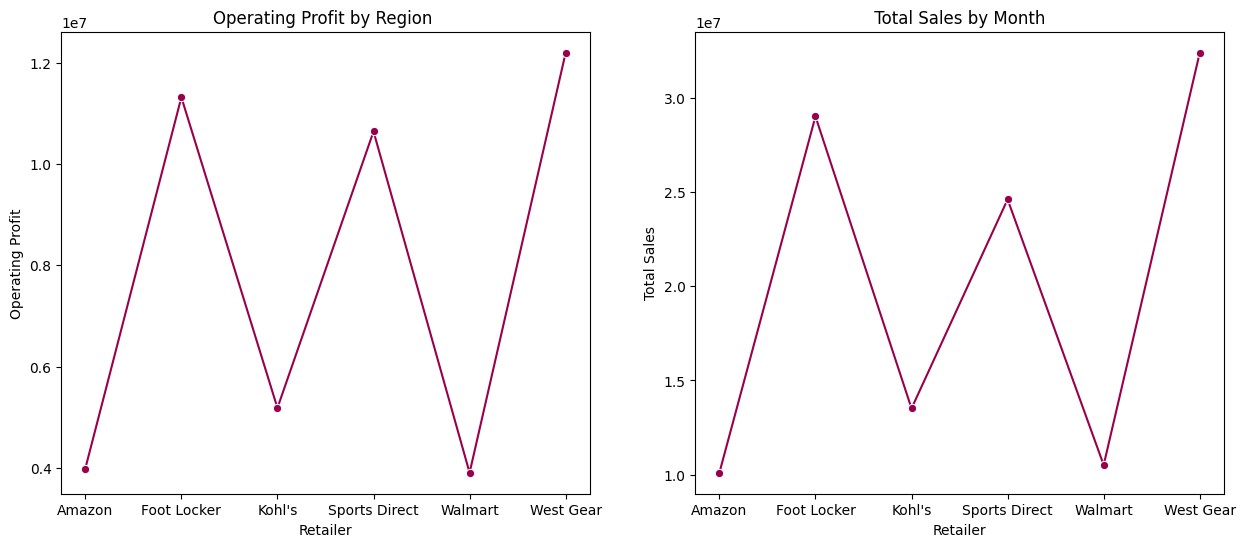

In [50]:
plt.figure(figsize = (15,6))
print(df.groupby("Retailer")["Operating Profit"].sum().sort_values(ascending=False).reset_index())
print('__'*20)
print(df.groupby("Retailer")["Total Sales"].sum().sort_values(ascending=False).reset_index())

# Plot for Operating Profit
plt.subplot(1,2,1)
sns.lineplot(data=df.groupby("Retailer")["Operating Profit"].sum().reset_index(), x='Retailer', y='Operating Profit', marker='o' , color ="#99004C" )
plt.title('Operating Profit by Region ')

# Plot for Total Sales
plt.subplot(1,2,2)
sns.lineplot(data=df.groupby("Retailer")["Total Sales"].sum().reset_index(), x='Retailer', y='Total Sales', marker='o' , color ="#99004C")
plt.title(' Total Sales by Month ')
plt.show()



In [36]:
table2 = df.groupby('Sales Method')[['Total Sales' , 'Operating Profit']].sum()
table2['Percentage of Sales'] = ((table2['Total Sales']/df['Total Sales'].sum())*100).round()
table2['Percentage of Profit'] = ((table2['Operating Profit']/df['Operating Profit'].sum())*100).round()
table2

,Total Sales,Operating Profit,Percentage of Sales,Percentage of Profit
Sales Method,,,,
In-store,35664375.0,12759128.75,30.0,27.0
Online,44965657.0,19552537.72,37.0,41.0
Outlet,39536618.0,14913301.23,33.0,32.0


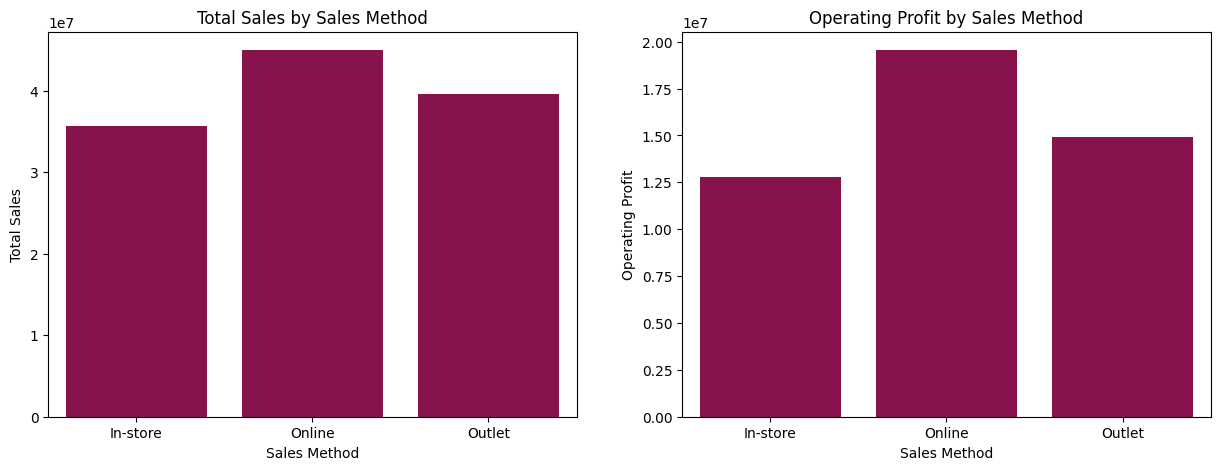

In [37]:
plt.figure(figsize = (15,5))

# Plot for Total Sales
plt.subplot(1,2,1)
sns.barplot(data=table2, x='Sales Method', y='Total Sales' , color ="#99004C" )
plt.title('Total Sales by Sales Method')

# Plot for Operating Profit
plt.subplot(1,2,2)
sns.barplot(data=table2, x='Sales Method', y='Operating Profit' , color ="#99004C" )
plt.title('Operating Profit by Sales Method')
plt.show()

<a id="8"></a>

## <b>8<span style='color:#80055D'>|</span>EDA 📈</b>

In [38]:
df.describe().round(2)

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.00,9648,9648.00,9648.00,9648.00,9648.00,9648.00
mean,1173849.72,2021-05-10 15:20:44.776119296,45.22,256.93,12455.08,4894.79,0.42
min,1128299.00,2020-01-01 00:00:00,7.00,0.00,0.00,0.00,0.10
25%,1185732.00,2021-02-17 00:00:00,35.00,106.00,4065.25,1753.44,0.35
50%,1185732.00,2021-06-04 00:00:00,45.00,176.00,7803.50,3262.98,0.41
75%,1185732.00,2021-09-16 00:00:00,55.00,350.00,15864.50,6192.36,0.49
max,1197831.00,2021-12-31 00:00:00,110.00,1275.00,82500.00,39000.00,0.80
std,26360.38,NaN,14.71,214.25,12716.39,4866.46,0.10


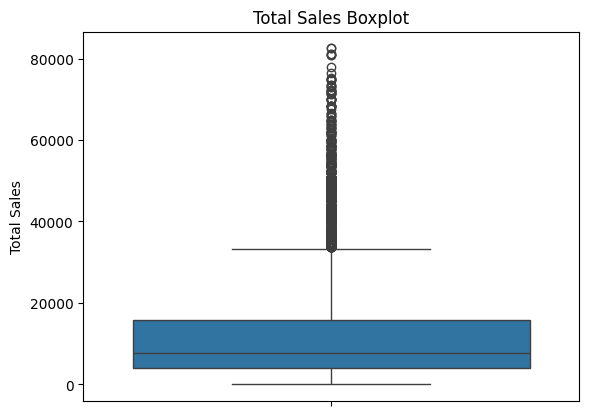

In [39]:
sns.boxplot(df["Total Sales"])
plt.title("Total Sales Boxplot")
plt.show()

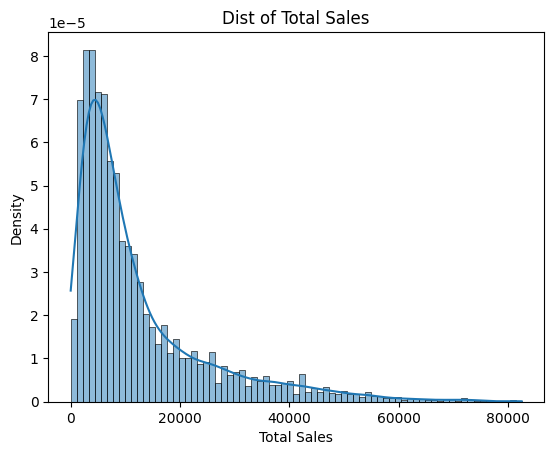

In [40]:
sns.histplot(df["Total Sales"] ,kde=True ,stat="density")
plt.title("Dist of Total Sales")
plt.show()

In [41]:
#(Normality Test)
# Shapiro-Wilk Test
shapiro_test_statistic, shapiro_p_value = shapiro(df['Total Sales'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

# D'Agostino and Pearson's Test
k2, p_value = normaltest(df['Total Sales'])
print("\nD'Agostino and Pearson's Test:")
print("Test Statistic:", k2)
print("p-value:", p_value)

Shapiro-Wilk Test:
Test Statistic: 0.7750177039127669
p-value: 2.698038661597717e-78

D'Agostino and Pearson's Test:
Test Statistic: 3697.8066380143255
p-value: 0.0


C:\Users\Mamzi\AppData\Local\Temp\ipykernel_22136\2971727436.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9648.
  shapiro_test_statistic, shapiro_p_value = shapiro(df['Total Sales'])


<div style="border-radius:10px;
            border : black solid;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Explanation of the code 
</center></h2>  
    
1. Shapiro-Wilk Test:
   - The Shapiro-Wilk Test is a test for normality. It evaluates whether a sample comes from a normally distributed population.
   - `shapiro_test_statistic`: This variable stores the test statistic calculated by the Shapiro-Wilk test.
   - `shapiro_p_value`: This variable stores the p-value associated with the Shapiro-Wilk test.
   - The calculated test statistic and p-value are printed.
   - Result:
     - Test Statistic: 0.7750177039127669
     - p-value: 2.698038661597717e-78
     - Interpretation: Since the p-value is very small (close to zero), typically less than any reasonable significance level (e.g., 0.05), we reject the null hypothesis that the data is normally distributed. This suggests that the 'Total Sales' data may not be normally distributed.

2. D'Agostino and Pearson's Test:
   - D'Agostino and Pearson's Test is another normality test, which tests whether a sample comes from a normally distributed population.
   - `k2`: This variable stores the test statistic calculated by D'Agostino and Pearson's test.
   - `p_value`: This variable stores the p-value associated with D'Agostino and Pearson's test.
   - The calculated test statistic and p-value are printed.
   - Result:
     - Test Statistic: 3697.8066380143255
     - p-value: 0.0
     - Interpretation: Similar to the Shapiro-Wilk test, the p-value is very small, indicating strong evidence against the null hypothesis of normality. Thus, based on this test as well, we reject the assumption of normality for the 'Total Sales' data.

In summary, both tests suggest that the 'Total Sales' data may not follow a normal distribution.

<a id="9"></a>

## <b>8<span style='color:#80055D'>|</span>2020 VS 2021</b>

In [59]:
year = df.groupby(df['Invoice Date'].dt.year)[['Operating Profit' ,'Total Sales' ]].sum().reset_index()
year

,Invoice Date,Operating Profit,Total Sales
0,2020,9015505.08,24237325.0
1,2021,38209462.62,95929325.0


In [63]:
year['Percentage Sales'] = ((year['Total Sales']/df['Total Sales'].sum())*100).round()
year['Percentage Profit'] = ((year['Operating Profit']/df['Operating Profit'].sum())*100).round()
year

,Invoice Date,Operating Profit,Total Sales,Percentage Sales,Percentage Profit
0,2020,9015505.08,24237325.0,20.0,19.0
1,2021,38209462.62,95929325.0,80.0,81.0


In [1]:
(95929325.0/24237325.0)*100

395.79171793917027

In [2]:
(38209462.62/9015505.08)*100

423.8194341963589